# Importing Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Car_sales.csv")
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [7]:
data.shape

(157, 16)

# Cleaning data

In [20]:
data.duplicated().sum()

0

In [5]:
data.nunique()

Manufacturer            30
Model                  156
Sales_in_thousands     157
__year_resale_value    117
Vehicle_type             2
Price_in_thousands     152
Engine_size             31
Horsepower              66
Wheelbase               88
Width                   78
Length                 127
Curb_weight            147
Fuel_capacity           55
Fuel_efficiency         20
Latest_Launch          130
Power_perf_factor      154
dtype: int64

In [8]:
# Dropping unnecessary columns
data = data.drop(["Vehicle_type"], axis=1)

In [21]:
data.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [9]:
data.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [23]:
data["__year_resale_value"].fillna(data["__year_resale_value"].median(), inplace=True)
data["Price_in_thousands"].fillna(data["Price_in_thousands"].median(), inplace=True)
data["Engine_size"].fillna(data["Engine_size"].median(), inplace=True)
data["Horsepower"].fillna(data["Horsepower"].median(), inplace=True)
data["Wheelbase"].fillna(data["Wheelbase"].median(), inplace=True)
data["Width"].fillna(data["Width"].median(), inplace=True)
data["Length"].fillna(data["Length"].median(), inplace=True)
data["Curb_weight"].fillna(data["Curb_weight"].median(), inplace=True)
data["Fuel_capacity"].fillna(data["Fuel_capacity"].median(), inplace=True)
data["Power_perf_factor"].fillna(data["Power_perf_factor"].median(), inplace=True)
data["Fuel_efficiency"].fillna(data["Fuel_efficiency"].median(), inplace=True)

In [10]:
data.columns = data.columns.str.replace(" ", "_")

In [14]:
# Finding maximum/minimum values through function
def max_min_values(col):
    frist = data[col].idxmax()
    frist_obs = pd.DataFrame(data.loc[frist])
    
    last = data[col].idxmin()
    last_obs = pd.DataFrame(data.loc[last])
    
    max_min = pd.concat([frist_obs, last_obs], axis=1)
    return max_min

    

In [15]:
max_min_values("Sales_in_thousands")

,56,83
Manufacturer,Ford,Mitsubishi
Model,F-Series,3000GT
Sales_in_thousands,540.561,0.11
__year_resale_value,15.075,20.94
Price_in_thousands,26.935,25.45
Engine_size,4.6,3.0
Horsepower,220.0,161.0
Wheelbase,138.5,97.2
Width,79.1,72.4
Length,224.5,180.3


# Data Exploration

(array([ 2., 27., 44., 42., 22., 10.,  7.,  1.,  0.,  1.]),
 array([ 55. ,  94.5, 134. , 173.5, 213. , 252.5, 292. , 331.5, 371. ,
        410.5, 450. ]),
 <BarContainer object of 10 artists>)

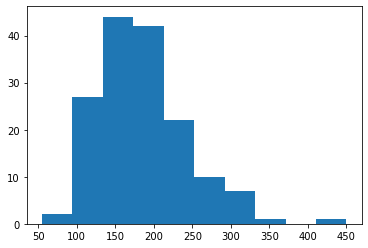

In [18]:
plt.hist(data['Horsepower'],10)

<AxesSubplot:xlabel='Horsepower', ylabel='Density'>

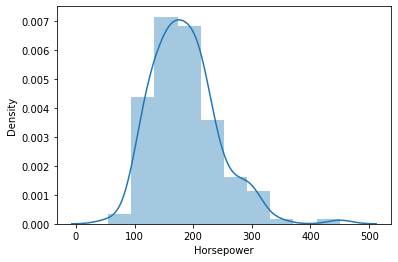

In [19]:
sns.distplot(data['Horsepower'],10)

In [26]:
make_dist = data.groupby("Manufacturer").size()
make_dist

Manufacturer
Acura          4
Audi           3
BMW            3
Buick          4
Cadillac       5
Chevrolet      9
Chrysler       7
Dodge         11
Ford          11
Honda          5
Hyundai        3
Infiniti       1
Jaguar         1
Jeep           3
Lexus          6
Lincoln        3
Mercedes-B     9
Mercury        6
Mitsubishi     7
Nissan         7
Oldsmobile     6
Plymouth       4
Pontiac        6
Porsche        3
Saab           2
Saturn         5
Subaru         2
Toyota         9
Volkswagen     6
Volvo          6
dtype: int64

<AxesSubplot:title={'center':'Make Distribution'}, xlabel='Manufacturer'>

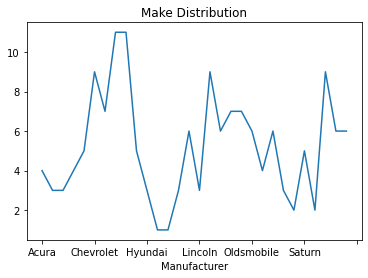

In [27]:
make_dist.plot(title='Make Distribution')

In [29]:
data_corr = data.corr()['Price_in_thousands']
data_corr

Sales_in_thousands    -0.303049
__year_resale_value    0.783928
Price_in_thousands     1.000000
Engine_size            0.626264
Horsepower             0.836720
Wheelbase              0.110727
Width                  0.329546
Length                 0.155968
Curb_weight            0.522770
Fuel_capacity          0.423697
Fuel_efficiency       -0.492416
Power_perf_factor      0.897945
Name: Price_in_thousands, dtype: float64

Text(0.5, 1.0, 'Correlation Between Variables')

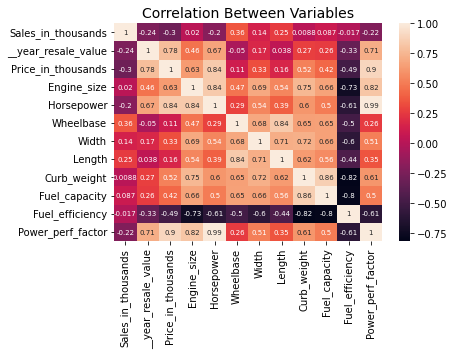

In [35]:
sns.heatmap(data.corr(), annot=True, annot_kws={"size":7})
plt.title("Correlation Between Variables", size=14)

<AxesSubplot:xlabel='Length', ylabel='Horsepower'>

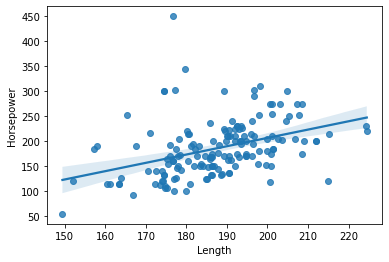

In [36]:
sns.regplot(data['Length'],data['Horsepower'])

[Text(0.5, 1.0, 'Price in thousands')]

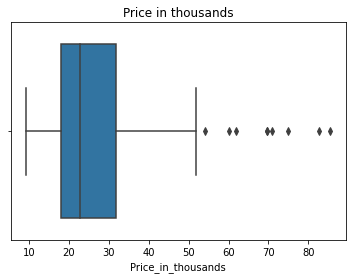

In [37]:
sns.boxplot(data["Price_in_thousands"]).set(title="Price in thousands")